In [1]:
import numpy as np

# 1. Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 2. Model prediction
def predict(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

# 3. Compute loss (cross-entropy)
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = - (1/m) * np.sum(
        y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8)
    )
    return loss

# 4. Train with Gradient Descent
def train(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    
    for i in range(epochs):
        y_pred = predict(X, w, b)
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        
        w -= lr * dw
        b -= lr * db
        
        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {compute_loss(y, y_pred):.4f}")
            
    return w, b

# 5. Example dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 0, 0, 1])  # AND logic gate

# Train model
w, b = train(X, y, lr=0.5, epochs=1000)

# Predict
preds = predict(X, w, b)
print("Predictions:", np.round(preds))


Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.2277
Epoch 200: Loss = 0.1431
Epoch 300: Loss = 0.1041
Epoch 400: Loss = 0.0815
Epoch 500: Loss = 0.0668
Epoch 600: Loss = 0.0564
Epoch 700: Loss = 0.0488
Epoch 800: Loss = 0.0430
Epoch 900: Loss = 0.0384
Predictions: [0. 0. 0. 1.]


## Evaluation Metrics

In [11]:
import numpy as np

def accuracy_score(y_true, y_pred):
    y_pred_label = (y_pred >= 0.5).astype(int)
    print(y_pred_label)
    return np.mean(y_pred_label == y_true)

def precision_score(y_true, y_pred):
    y_pred_label = (y_pred >= 0.5).astype(int)
    tp = np.sum((y_pred_label == 1) & (y_true == 1))
    fp = np.sum((y_pred_label == 1) & (y_true == 0))
    return tp / (tp + fp + 1e-8)

def recall_score(y_true, y_pred):
    y_pred_label = (y_pred >= 0.5).astype(int)
    tp = np.sum((y_pred_label == 1) & (y_true == 1))
    fn = np.sum((y_pred_label == 0) & (y_true == 1))
    return tp / (tp + fn + 1e-8)

def f1_score(y_true, y_pred):
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec + 1e-8)


In [5]:
# y thật và predict
y_true = np.array([0, 1, 1, 0, 1, 0])
y_pred = np.array([0.1, 0.8, 0.9, 0.3, 0.7, 0.2])

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))


[0 1 1 0 1 0]
Accuracy: 1.0
Precision: 0.9999999966666667
Recall: 0.9999999966666667
F1 Score: 0.9999999916666666


## PART 2 — So sánh Cross-Entropy vs MSE
💡 Ý tưởng:

Dùng sigmoid làm output → logistic regression kiểu classification.

Dùng MSE (Mean Squared Error) và Cross-Entropy (CE) để xem gradient khác nhau thế nào.

CE có gradient lớn hơn ở vùng prediction sai → học nhanh và ổn định hơn.

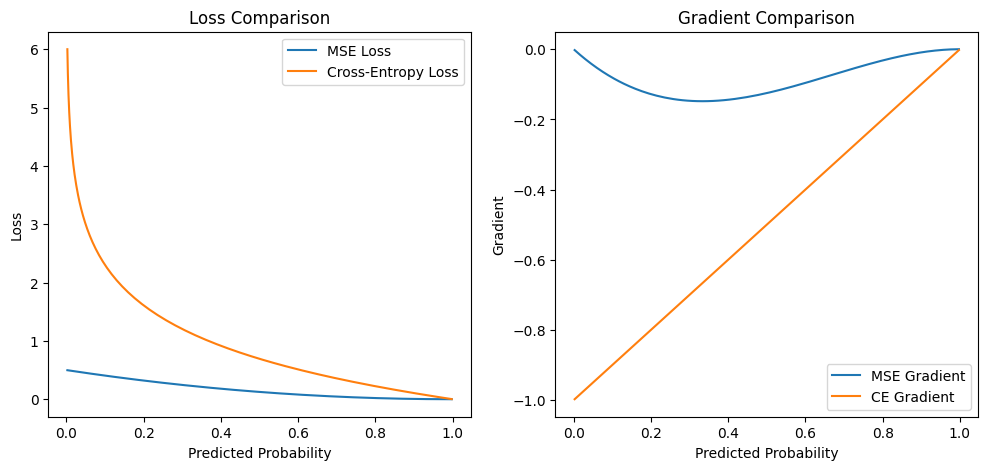

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss functions
def mse_loss(y, y_hat):
    return 0.5 * (y - y_hat)**2

def cross_entropy_loss(y, y_hat):
    eps = 1e-8
    return - (y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))

# Gradient of each
def grad_mse(y, y_hat):
    return (y_hat - y) * y_hat * (1 - y_hat)

def grad_ce(y, y_hat):
    return y_hat - y

# Generate predictions
z = np.linspace(-6, 6, 200)
y = 1  # giả định nhãn thật = 1
y_hat = sigmoid(z)

# Compute
loss_mse = mse_loss(y, y_hat)
loss_ce = cross_entropy_loss(y, y_hat)
grad_mse_vals = grad_mse(y, y_hat)
grad_ce_vals = grad_ce(y, y_hat)

# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(y_hat, loss_mse, label='MSE Loss')
plt.plot(y_hat, loss_ce, label='Cross-Entropy Loss')
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Comparison")

plt.subplot(1, 2, 2)
plt.plot(y_hat, grad_mse_vals, label='MSE Gradient')
plt.plot(y_hat, grad_ce_vals, label='CE Gradient')
plt.xlabel("Predicted Probability")
plt.ylabel("Gradient")
plt.legend()
plt.title("Gradient Comparison")

plt.show()


In [13]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        # TODO: sigmoid function
        # Hint: công thức = 1 / (1 + np.exp(-z))
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Khởi tạo trọng số
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            # TODO: tính linear model (z)
            # Hint: z = X @ weights + bias
            z = X @ self.weights + self.bias
            # pass

            # TODO: sigmoid activation
            # Hint: gọi self.sigmoid(z)
            y_pred = self.sigmoid(z)
            # pass

            # TODO: tính gradient của weights và bias
            # Hint: dw = (1/n) * X.T @ (y_pred - y)
            #       db = (1/n) * np.sum(y_pred - y)
            dw = (1/n_samples) * X.T @ (y_pred - y)
            db = (1/n_samples) * np.sum(y_pred - y)
            # pass

            # TODO: update weights, bias (gradient descent)
            # Hint: w = w - lr * dw
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            # pass

            if _ % 100 == 0:
                loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
                print(f"Iter {_}: loss = {loss:.4f}")

    def predict_proba(self, X):
        # Trả về xác suất
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def predict(self, X):
        # TODO: chuyển xác suất thành label 0/1
        # Hint: np.where(prob >= 0.5, 1, 0)
        prob = self.predict_proba(X)        
        return np.where(prob >= 0.5, 1, 0)
        # pass



### Train/test split

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Chọn vài cột đơn giản
X = df[["Pclass", "Age", "SibSp", "Parch", "Fare"]]
y = df["Survived"]

# Fill missing values
X["Age"].fillna(X["Age"].median(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


/tmp/ipykernel_12571/2140593873.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Age"].fillna(X["Age"].median(), inplace=True)
/tmp/ipykernel_12571/2140593873.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"].fillna(X["Age"].median(), inplace=True)


In [14]:
model = LogisticRegressionScratch(lr=0.1, n_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Iter 0: loss = 0.6931
Iter 100: loss = 0.5910
Iter 200: loss = 0.5879
Iter 300: loss = 0.5874
Iter 400: loss = 0.5873
Iter 500: loss = 0.5873
Iter 600: loss = 0.5873
Iter 700: loss = 0.5873
Iter 800: loss = 0.5873
Iter 900: loss = 0.5873
[0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0]
Accuracy: 0.7318435754189944


### Train LogisticRegression, grid search hyperparameter.


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define model & hyperparams
params = {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2"], "solver": ["liblinear"]}
logreg = LogisticRegression()

# Grid Search
grid = GridSearchCV(logreg, params, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy: 0.7008076430611643


## So sánh performance vs model scratch

In [16]:
import time

# Train scratch model
start = time.time()
model.fit(X_train, y_train)
print("Scratch training time:", time.time() - start)

# Predict
y_pred_scratch = model.predict(X_test)
acc_scratch = accuracy_score(y_test, y_pred_scratch)

# So với sklearn
acc_sklearn = accuracy_score(y_test, grid.best_estimator_.predict(X_test))

print(f"Scratch acc: {acc_scratch:.4f}, Sklearn acc: {acc_sklearn:.4f}")


Iter 0: loss = 0.6931
Iter 100: loss = 0.5910
Iter 200: loss = 0.5879
Iter 300: loss = 0.5874
Iter 400: loss = 0.5873
Iter 500: loss = 0.5873
Iter 600: loss = 0.5873
Iter 700: loss = 0.5873
Iter 800: loss = 0.5873
Iter 900: loss = 0.5873
Scratch training time: 0.33471202850341797
[0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0]
[0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 

### Visualize confusion matrix, ROC curve.


Accuracy: 0.7430167597765364
Precision: 0.7692307692307693
Recall: 0.5405405405405406
F1: 0.6349206349206349


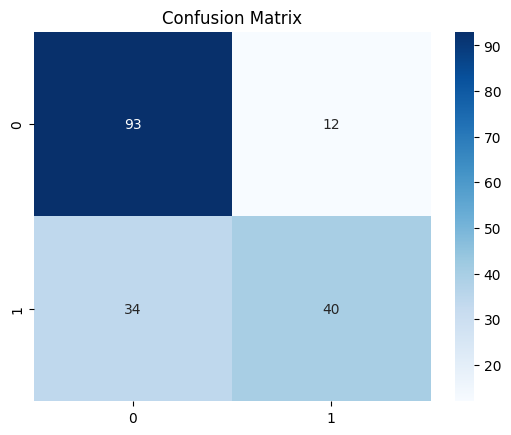

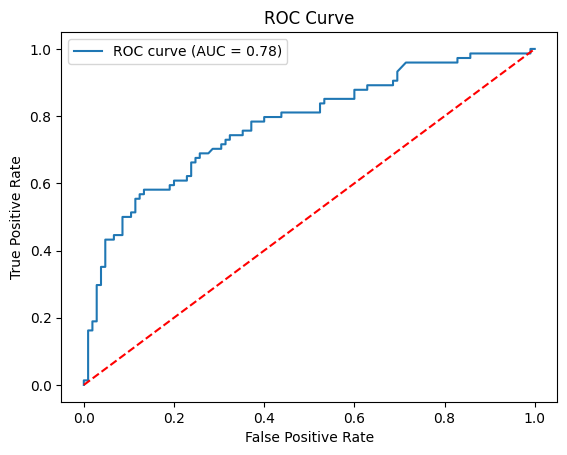

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = grid.best_estimator_.predict(X_test)
y_prob = grid.best_estimator_.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


,Date,Category,Description,Payment Method,Amount,Notes
0,2025-11-05,Fun & Flex,Football,Momo,"46,000.00",-
1,2025-11-05,Essentials,Evening,Cash,"37,000.00",Bánh xèo
2,2025-11-06,Fun & Flex,Netflix,Momo,"273,000.00",NaN
3,2025-11-06,Fun & Flex,Coffee,Cash + Momo,"80,000.00",NaN
4,2025-11-06,Essentials,Photos,Cash,"70,000.00",Ảnh thẻ
5,2025-11-07,Essentials,Breakfast,Bank,"87,000.00",NaN
6,2025-11-07,Essentials,Lunch,Momo,"59,000.00",NaN
7,2025-11-07,Fun & Flex,Coffee,Momo,"55,000.00",2land
8,2025-11-08,Fun & Flex,Gift,Bank,"179,000.00",Mua mbh cho ken
9,2025-11-08,Fun & Flex,Birthday,Bank,"850,000.00",NaN
